# Project: Investigating Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I will be looking at movie data and what variables are most affected and influenced by others. The topics I will be focusing on are the following:  

1)What traits do movies that make a lot of money have in common?  

2)How have movies changed over the years?

In [1]:
#Import necessary tools and data

import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> It looks like the revenue and budget numbers are really off. The data shows that at least half the movies had 0 budget and 0 revenue which does not seem right. 

In [4]:
#Drop columns I will not be using in the analysis

df.drop(['id','imdb_id','homepage','tagline','keywords','overview','production_companies'],axis=1,inplace= True)

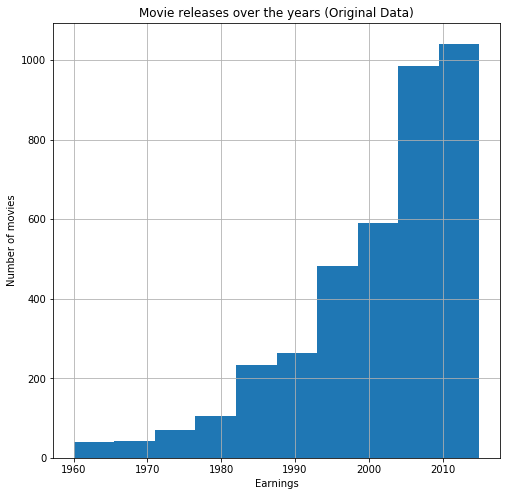

In [24]:
df['release_year'].hist(figsize = (8,8))
plt.title('Movie releases over the years (Original Data)')
plt.ylabel('Number of movies')
plt.xlabel('Earnings');


> Before I clean my data, I want to see this histogram of the increase of movies being made each year. Even though the budget and revenue columns have a lot of errors, the movie name and year of production seem to be alright.

### Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


> Here I can see that even though the revenue and budget for some movies seem to be missing, they are very few NAN columns and they all have values. I want to drop the rows that do not have budget and revenue information because those are the focus of my analysis. I can't substitute the values with the mean either because that would cause very inaccurate data.

In [7]:
df.fillna('None',inplace=True)

>Since all of the NAN values in the data are characteristics of the movie, I just filled the spots with a word.

In [8]:
df['budget'].replace(0,pd.np.nan,inplace=True)
df['revenue'].replace(0,pd.np.nan,inplace=True)
df.dropna(inplace= True)

>I replaced every 0 value in the budget and revenue columns with NAN so that I could drop any rows without complete info. This unfortunately drops over half the rows and only leaves behind movies that have full data. 

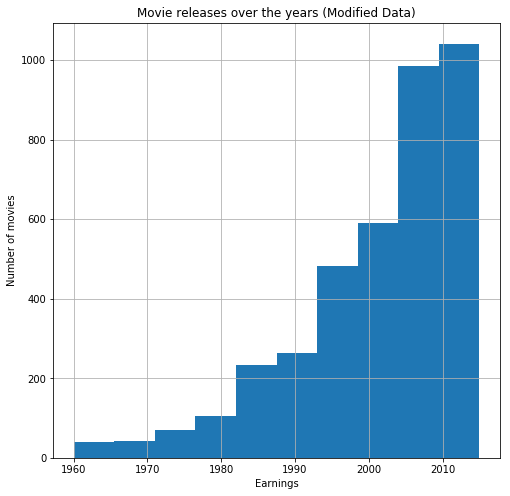

In [25]:
df['release_year'].hist(figsize = (8,8))
plt.title('Movie releases over the years (Modified Data)')
plt.ylabel('Number of movies')
plt.xlabel('Earnings');

>I run the release year histogram again and the graph is actually equally skewed to the left. This means that the lack of data is probably due to the relevance of the film. Smaller films have less data.

In [10]:
df['earnings_adj'] = df['revenue_adj'] - df['budget_adj']

>A new column is added to better see how much a movie earns after taking spending into account.

<a id='eda'></a>
## Exploratory Data Analysis


### What key characteristics influence a movies earnings?

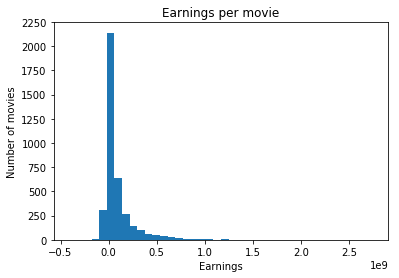

In [11]:
#Plot a histogram with more bins to see exactly which group is the most common

df['earnings_adj'].plot.hist(bins=40)
plt.title('Earnings per movie')
plt.ylabel('Number of movies')
plt.xlabel('Earnings');

>The graph for earnings is very skewed right. This graph shows that most movies do not actually make too much money. However it does seem that in general, making a movie ends up being profitable even if just slightly.

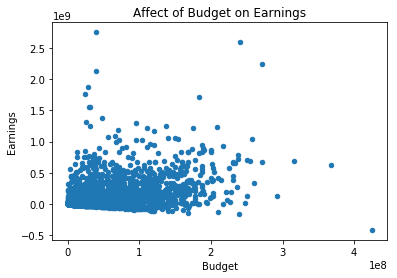

In [12]:
df.plot.scatter('budget_adj','earnings_adj')
plt.title('Affect of Budget on Earnings')
plt.xlabel('Budget')
plt.ylabel('Earnings');

>It looks like there are still some values for the budget that are very close to 0. There are also some movies that lost money with one outlier on the very right with the highest budget and the biggest loss.

In [13]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,earnings_adj
popularity,1.000000,0.446993,0.615556,0.215157,0.780106,0.317924,0.173179,0.399375,0.546985,0.516896
budget,0.446993,1.000000,0.688548,0.260989,0.556939,0.024227,0.267984,0.958518,0.533497,0.372780
revenue,0.615556,0.688548,1.000000,0.250398,0.754583,0.227279,0.139001,0.657577,0.900892,0.851381
runtime,0.215157,0.260989,0.250398,1.000000,0.273842,0.351909,-0.112607,0.334011,0.280604,0.235355
vote_count,0.780106,0.556939,0.754583,0.273842,1.000000,0.387271,0.207073,0.497988,0.654713,0.614090
vote_average,0.317924,0.024227,0.227279,0.351909,0.387271,1.000000,-0.134493,0.036913,0.266996,0.288795
release_year,0.173179,0.267984,0.139001,-0.112607,0.207073,-0.134493,1.000000,0.075032,-0.103260,-0.132311
budget_adj,0.399375,0.958518,0.657577,0.334011,0.497988,0.036913,0.075032,1.000000,0.570466,0.404370
revenue_adj,0.546985,0.533497,0.900892,0.280604,0.654713,0.266996,-0.103260,0.570466,1.000000,0.981856
earnings_adj,0.516896,0.372780,0.851381,0.235355,0.614090,0.288795,-0.132311,0.404370,0.981856,1.000000


>My main question originally was whether of not the budget of a movie would affect the earnings of a movie, a.k.a. can you just put together a bunch of talent and make money. The results seem to show a little bit of correlation with the coefficient being .4. This agrees with my original thinking that while you can just use starpower to make and sell movies, the movie has to actually be good for people to spend money.

In [14]:
#The function will give the count of the unique values in a column.
#We need this because some of the columns contain multiple values.

#Join the entire column of genres into one string and put a | separator in between.

def split_count(df,column):
    data = df[column].str.cat(sep ='|')
    
    #Split based on the separator so we have a series we can count
    data = pd.Series(data.split('|'))
    
    #Count the amount of each column
    count = data.value_counts()
    return count

#Create counts of columns that have multiple values separated by |
genre_count = split_count(df,'genres')
cast_count = split_count(df,'cast')

In [15]:
#Preview of the generated dataframe

genre_count.head()

Drama        1757
Comedy       1358
Thriller     1205
Action       1086
Adventure     749
dtype: int64

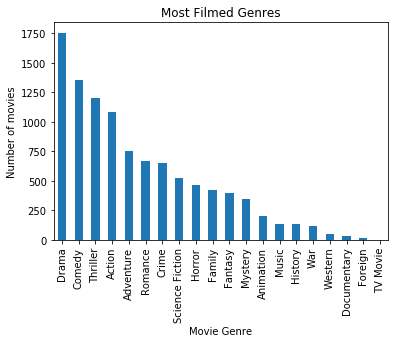

In [16]:
#Bar graph showing the number of movies of each genre

genre_count.plot.bar()
plt.title('Most Filmed Genres')
plt.ylabel('Number of movies')
plt.xlabel('Movie Genre');

>Drama seems to be the most popular category. This may be because of the broadness of a movie being in the Drama category.

In [17]:
#Get the mean earnings of a genre

def mean_earnings(df,genre):
    genre = df[df['genres'].str.contains(genre)]
    return genre['earnings_adj'].mean()

In [18]:
print(mean_earnings(df,'Drama'))
print(mean_earnings(df,'Action'))

66611535.6113
128799847.265


>Surprisingly Drama is not the biggest moneymaker even though it is the most common. Maybe movie producers don't always make movies to make money?

### How have movies changed throughout the years?

>As we saw in the beginning, there are many more movies being produced as the years have gone on. Let's take a look at what this increase in movies produced has changed.

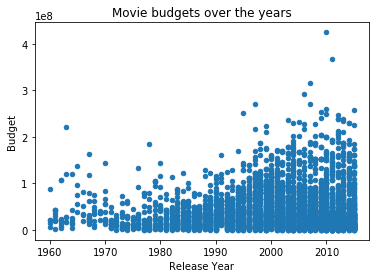

In [19]:
df.plot.scatter('release_year','budget_adj')
plt.title('Movie budgets over the years')
plt.xlabel('Release Year')
plt.ylabel('Budget');

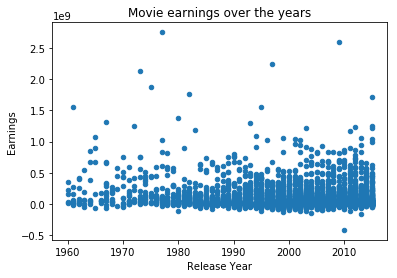

In [20]:
df.plot.scatter('release_year','earnings_adj')
plt.title('Movie earnings over the years')
plt.xlabel('Release Year')
plt.ylabel('Earnings');

>I created scatter plots comparing year and we can see that while there is not much correlation between these two graphs, the adjusted budget shows many more movies produced with high budgets. I think it is safe to say that a lot more blockbusters are being made that cost a significant amount more money than they did before.

In [21]:
df['release_year'].describe()

count    3855.000000
mean     2001.263294
std        11.281989
min      1960.000000
25%      1995.000000
50%      2004.000000
75%      2010.000000
max      2015.000000
Name: release_year, dtype: float64

>As we can see from the distribution of number of movies made, there have been an increasing amount of movies being made each decade. 25% of all movies ever made were made between 2010 and 2015. This shows that even though the earnings of movies throughout the years has been about the same, there are a whole lot more movies to split the earnings with. 

<a id='conclusions'></a>
## Conclusions

All in all the conclusions I have drawn are not too far away from my original ideas. Here are the main conclusions I came up with:

### Does spending more money to make a movie increase total earnings?

With a correlation coefficient of .4 it looks like there is some correlation between spending more and making more. I think this would have to do with stronger advertising and being able to hire higher quality actors.

### Is it the movie creators goal only to make money?

After looking at the different genres and their earnings, it seems like most directors just want to tell a story. Drama was the most popular category but it was not the highest money maker which signifies they are not completly driven by money.

### What characteristics have changed about movies as the years have gone by?

There are definitely more movies being made in the present than before. There is also more money being spent making movies and going to the movies. However it does not appear that the highest grossing movies are that much more superior now than before.

### Limitations

When sorting through the data, I had to remove over half the movies simply because they did not have the information I needed. Other things I would explore with this dataset are the popularity and the voting system. I did not use these just because I didn't really understand what they represented. I could have used the votes columns to determine if higher voted movies earned more or if more popular movies earned more.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0